# Аналитика в Pandas

## Импорт библиотек, загрузка данных

In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, roc_auc_score
import datetime
from sklearn.preprocessing import StandardScaler

In [125]:
# !pip install catboost

Сегодня мы используем датасет про клиентов банка, решаю задачу предсказания оттока клиента: https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers

In [126]:
df = pd.read_csv('BankChurners.csv')

CLIENTNUM	- Уникальный идентификатор клиента  
Attrition_Flag	- Целевая переменная: Existing Customer / Attrited Customer  
Customer_Age	- Возраст клиента  
Gender -	Пол (M — Male, F — Female)  
Dependent_count	- Количество иждивенцев  
Education_Level	- Уровень образования  
Marital_Status -	Семейное положение  
Income_Category	- Категория годового дохода  
Card_Category	- Тип карты (Blue, Silver, Gold, Platinum)  
Months_on_book	- Период отношения с банком (в месяцах)  
Total_Relationship_Count	- Общее количество продуктов банка у клиента  
Months_Inactive_12_mon	- Количество месяцев без активности за последние 12 месяцев
Contacts_Count_12_mon	- Количество контактов за последние 12 месяцев  
Credit_Limit	- Кредитный лимит  
Total_Revolving_Bal -	Общий револьверный баланс  
(Сумма задолженности, которая переносится на следующий месяц с
начислением процентов. Высокий баланс может указывать на активное
использование кредита)
Avg_Open_To_Buy	- Средний доступный кредит (Open to Buy)  
(Разница между кредитным лимитом (Credit_Limit) и револьверным балансом.
Показывает, сколько клиент еще может потратить.  
Ключевой показатель финансовой гибкости).
Total_Amt_Chng_Q4_Q1	- Изменение суммы транзакций (Q4 над Q1)  
Total_Trans_Amt	- Общая сумма транзакций за 12 месяцев  
Total_Trans_Ct	- Общее количество транзакций за 12 месяцев  
Total_Ct_Chng_Q4_Q1	- Изменение количества транзакций (Q4 над Q1)  
Avg_Utilization_Ratio	Средний коэффициент использования карты  
(Total_Revolving_Bal / Credit_Limit. Важный показатель для кредитного  
скоринга. Высокий коэффициент (близкий к 1) может сигнализировать о  
финансовой нагрузке).  

## Exploratory Data Analysis (EDA)

При решении любой аналитической / ML задачи важно предварительно хорошо понять наши данные.
Поэтому начнем мы с проведения исследовательского анализа данных (EDA).
Это поможет нам:
* Понять структуру и содержание наших данных
* Выявить возможные проблемы с данными (пропущенные значения, дубликаты, выбросы)
* Определить основные характеристики переменных, распределение)
* Определить взаимосвязи между переменными

Посмотрим на наши данные.

In [127]:
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


Начнем с метода  `df.info()`- посмотрим на типы столбцов, пропущенные значения и т.п.

In [128]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [129]:
df.isnull().sum() # проверяем пропуски

,0
CLIENTNUM,0
Attrition_Flag,0
Customer_Age,0
Gender,0
Dependent_count,0
Education_Level,0
Marital_Status,0
Income_Category,0
Card_Category,0
Months_on_book,0


Пропусков нет - нам повезло.

Теперь используем метод `.describe()`, чтобы посчитать основные описательные статистики для числовых столбцов

In [130]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


In [131]:
df.shape

(10127, 23)

Теперь посчитаем статистики для категориальных переменных:

In [132]:
df.describe(include='object')

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,10127,10127,10127,10127
unique,2,2,7,4,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


In [133]:
df = df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
              'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',
              'CLIENTNUM'], axis=1)

In [134]:
df.select_dtypes(['int']).columns

Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Total_Revolving_Bal', 'Total_Trans_Amt',
       'Total_Trans_Ct'],
      dtype='object')

In [135]:
int_columns = df.select_dtypes(['int']).columns

Построим распределения числовых переменных:

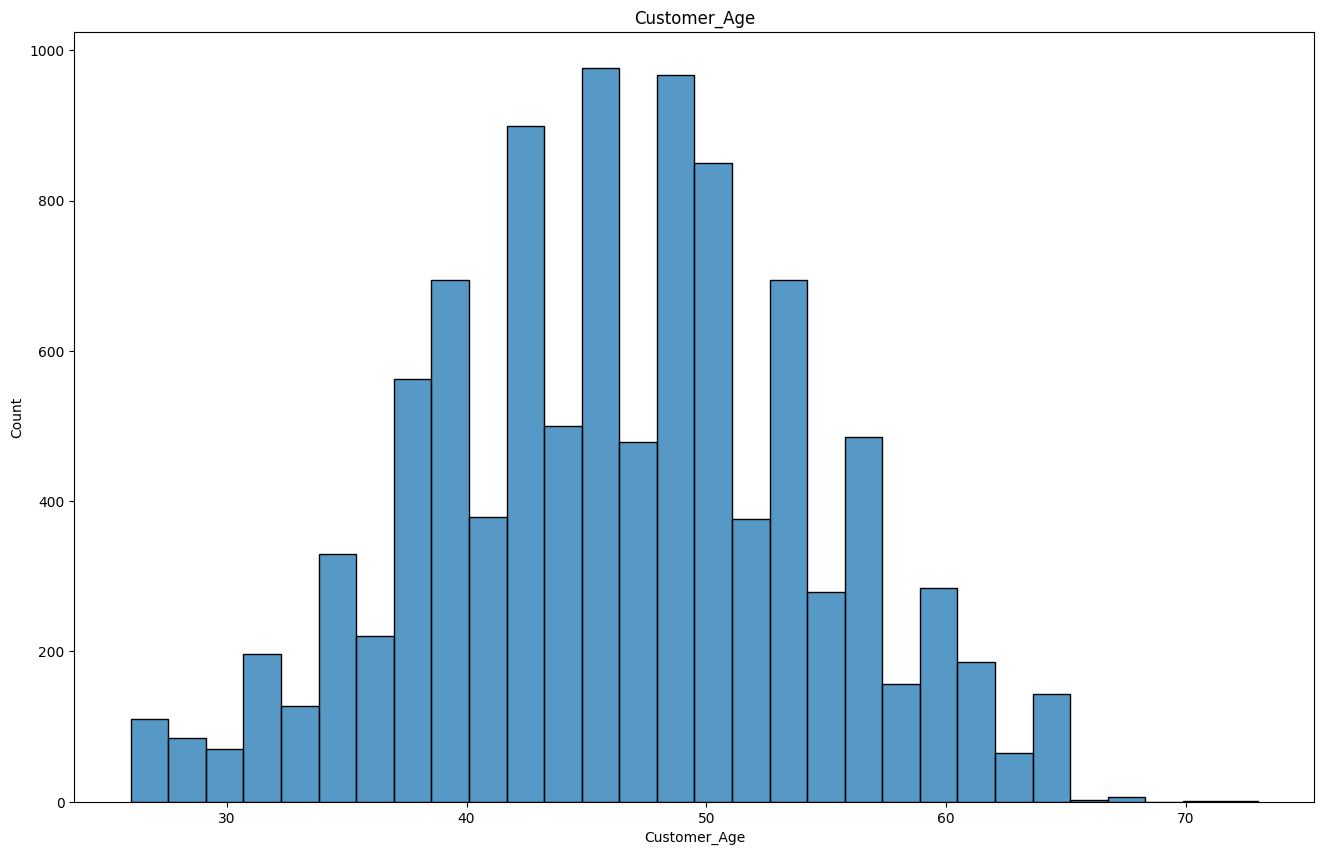

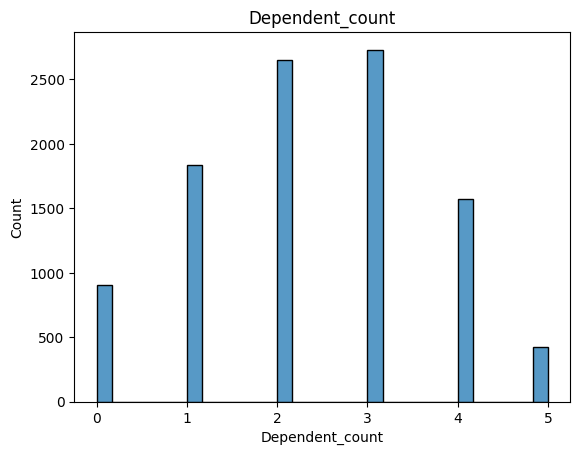

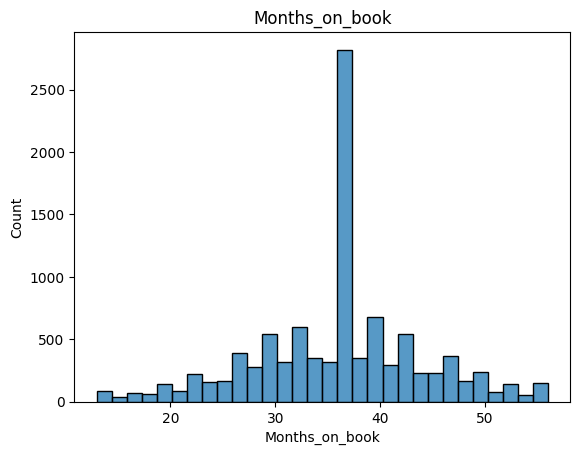

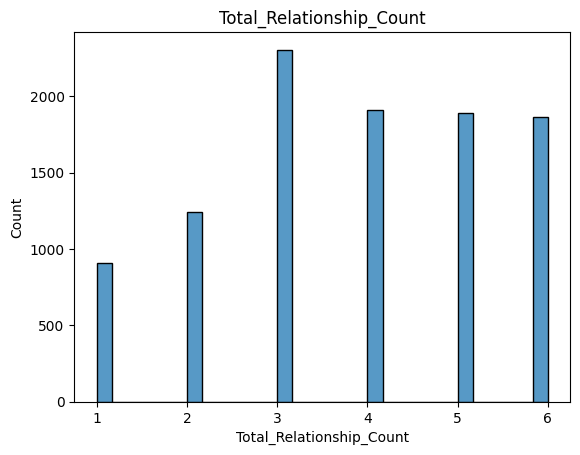

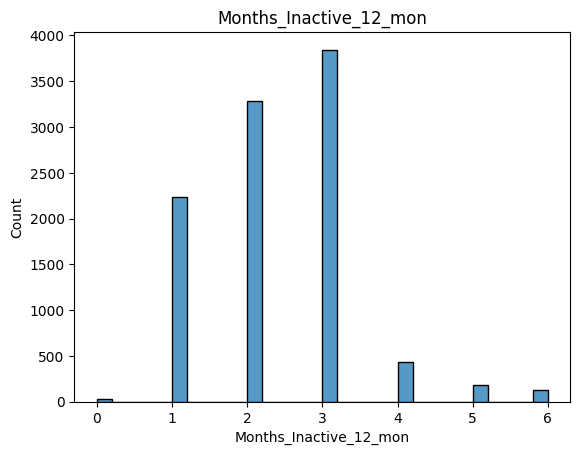

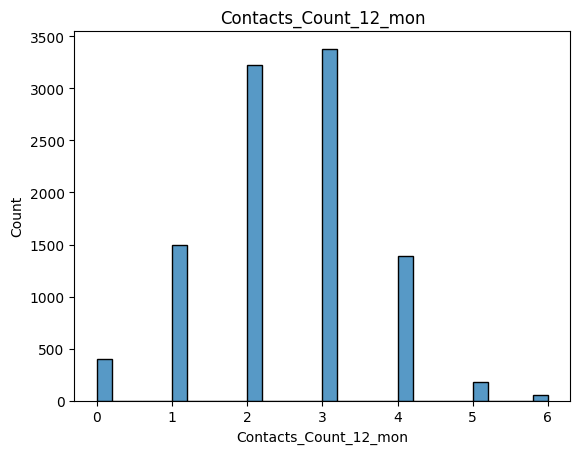

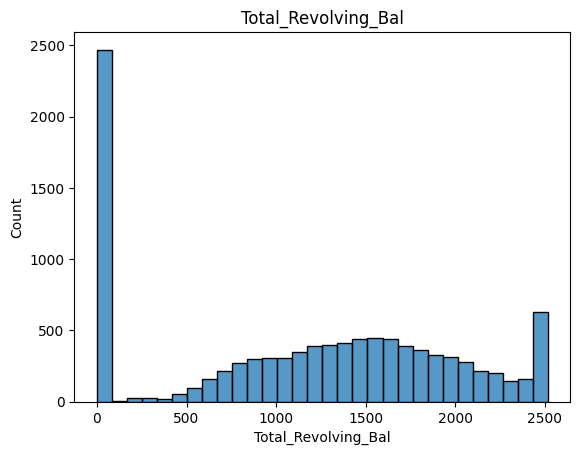

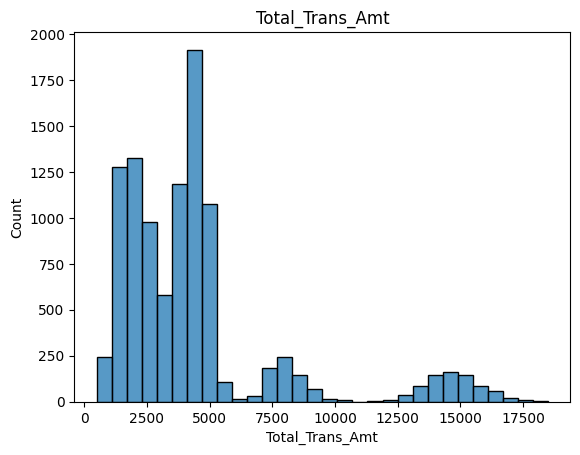

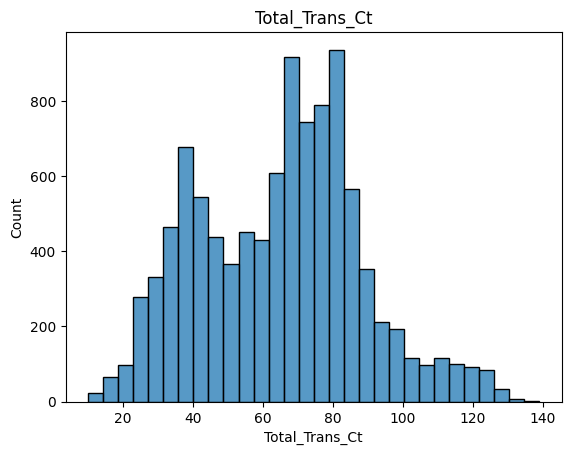

In [136]:
plt.figure(figsize=(16, 10))

for var in int_columns:
    sns.histplot(df[var], bins=30)
    plt.title(var)
    plt.show()

Теперь давайте сравнием распределения среди групп клиентов, у которых `Attrition_Flag  = 1` и у которых `Attrition_Flag  = 0`

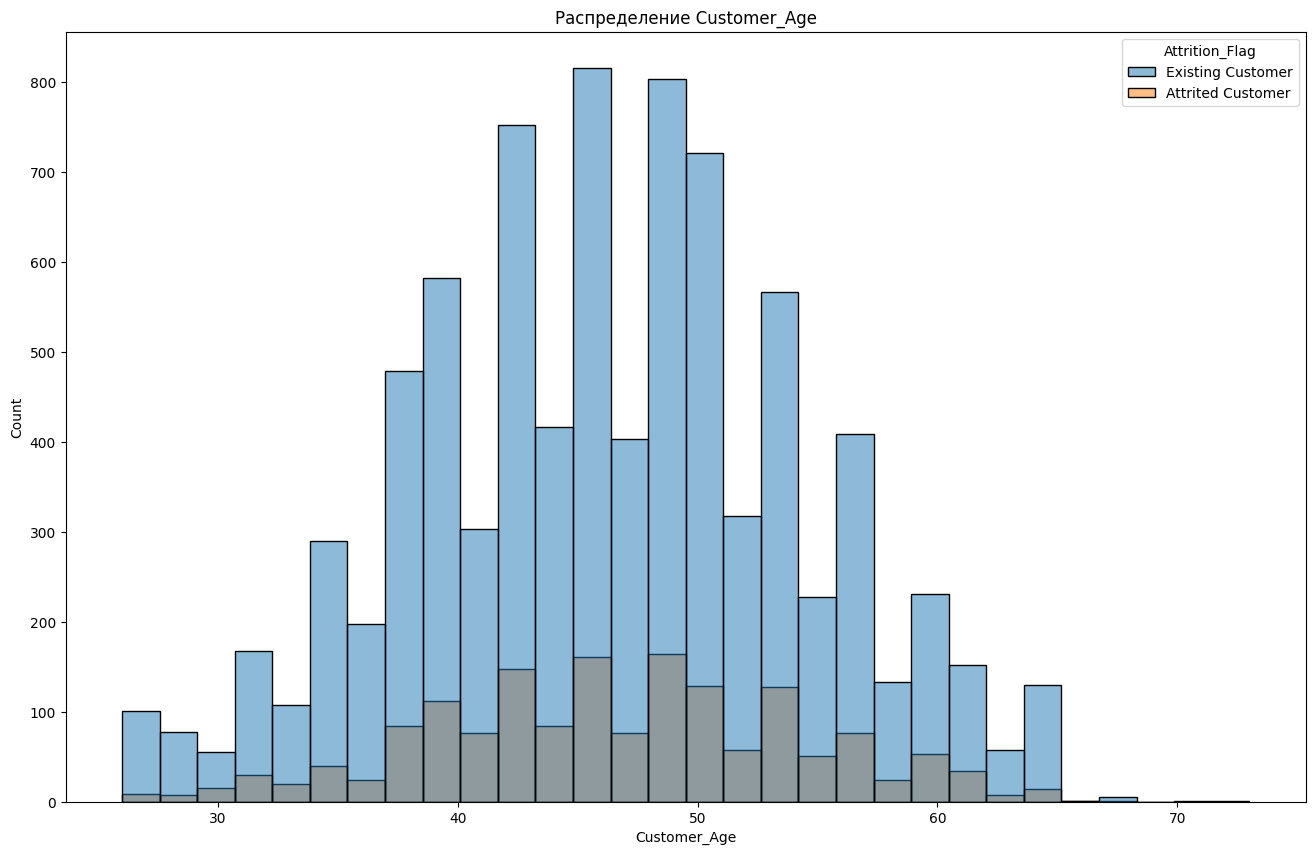

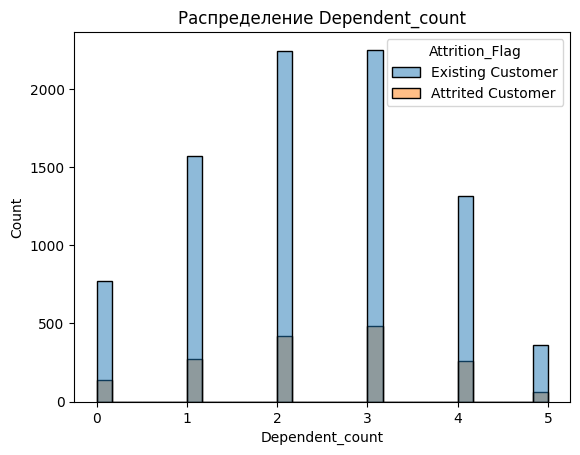

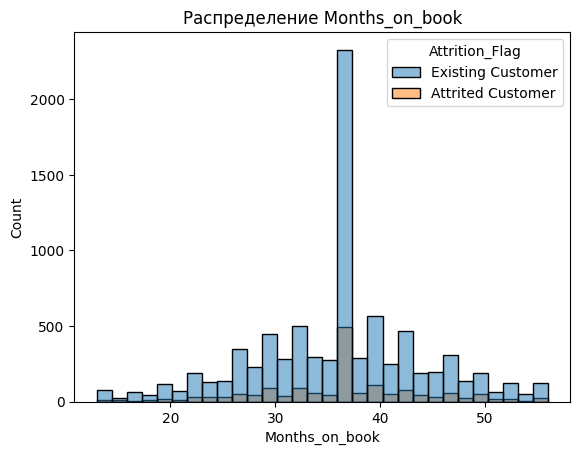

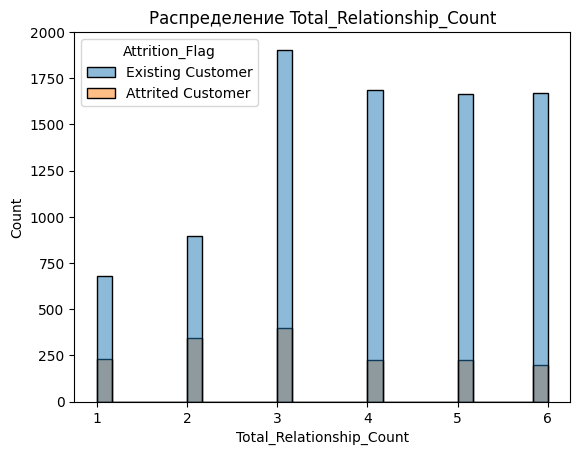

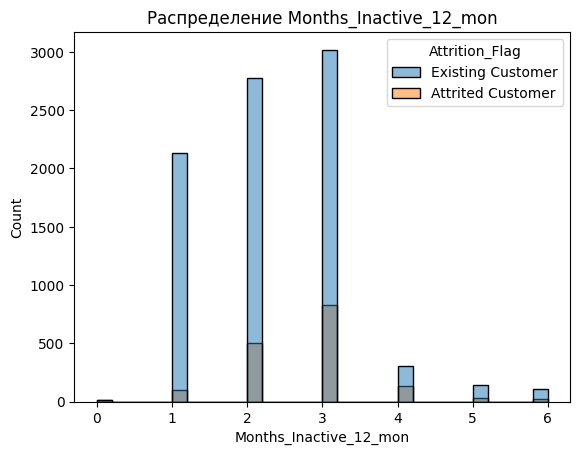

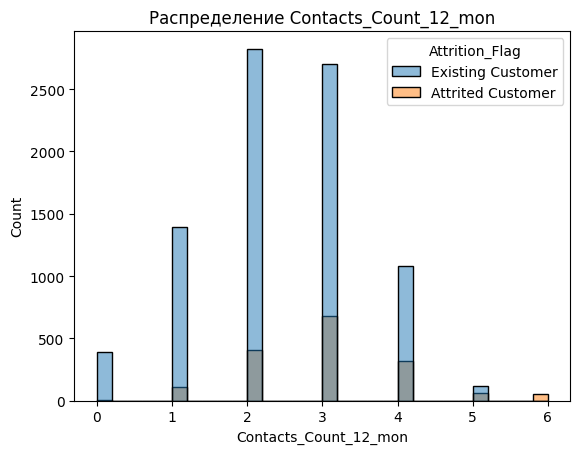

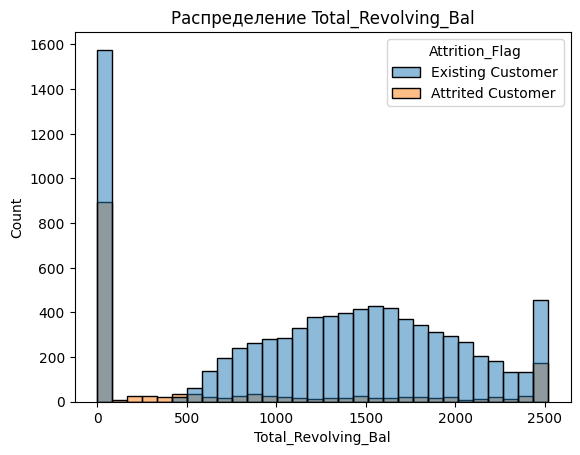

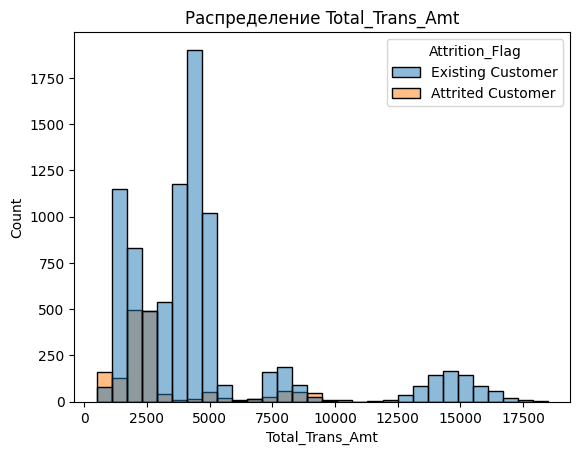

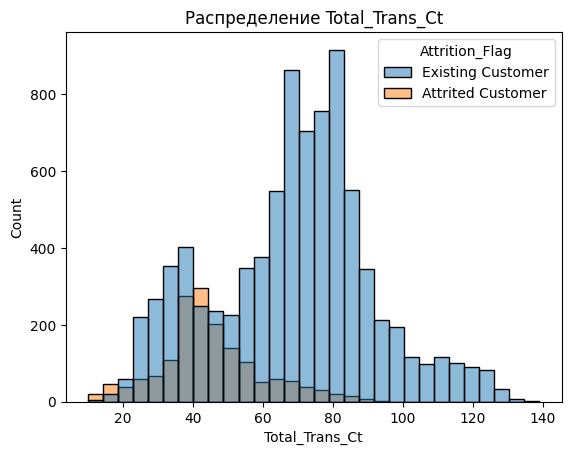

In [137]:
plt.figure(figsize=(16, 10))

for var in int_columns:
    sns.histplot(df, x = var, hue = 'Attrition_Flag', bins=30)
    plt.title(f'Распределение {var}')
    plt.show()

In [138]:
df.groupby(['Attrition_Flag'])[['Dependent_count', 'Months_on_book',
                          'Total_Relationship_Count']].describe()

Dependent_count                                          \
                            count      mean       std  min  25%  50%  75%   
Attrition_Flag                                                              
Attrited Customer          1627.0  2.402581  1.275010  0.0  2.0  2.0  3.0   
Existing Customer          8500.0  2.335412  1.303229  0.0  1.0  2.0  3.0   

                       Months_on_book             ...              \
                   max          count       mean  ...   75%   max   
Attrition_Flag                                    ...               
Attrited Customer  5.0         1627.0  36.178242  ...  40.0  56.0   
Existing Customer  5.0         8500.0  35.880588  ...  40.0  56.0   

                  Total_Relationship_Count                                     \
                                     count      mean       std  min  25%  50%   
Attrition_Flag                                                                  
Attrited Customer                   1627.0  3.279656  1.577782  1.0  2.0  3.0   
Existing Customer                   8500.0  3.914588  1.528949  1.0  3.0  4.0   

                             
                   75%  max  
Attrition_Flag               
Attrited Customer  5.0  6.0  
Existing Customer  5.0  6.0  

[2 rows x 24 columns]

In [139]:
df.select_dtypes(['object']).columns

Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object')

Теперь построим графики бинарных и категориальных переменных.

<Axes: xlabel='Attrition_Flag', ylabel='count'>

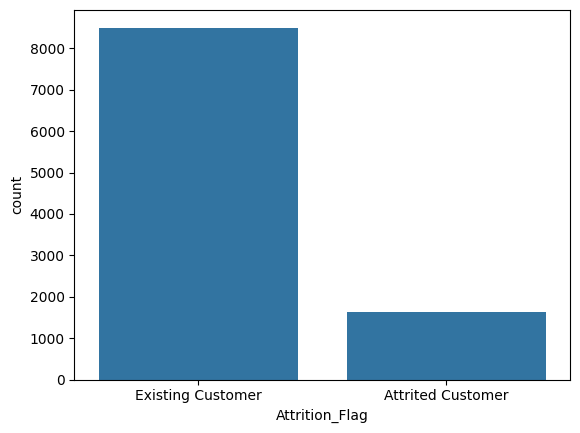

In [140]:
sns.countplot(data=df, x = 'Attrition_Flag')

In [141]:
categorical_variables = ['Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Gender']

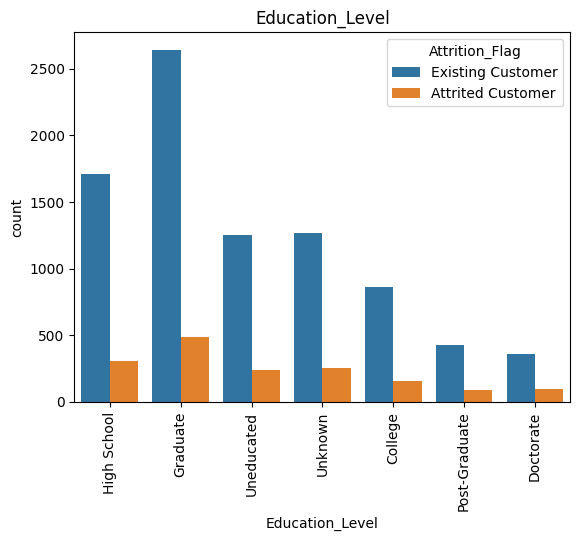

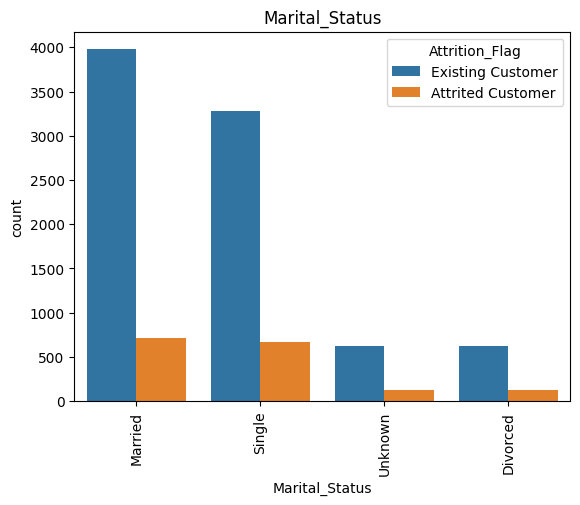

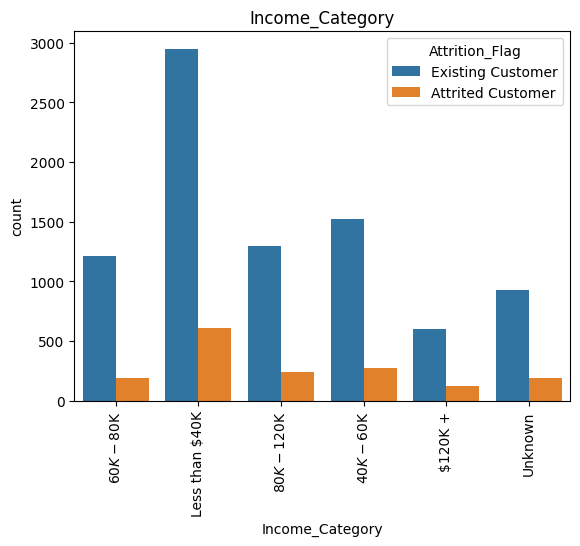

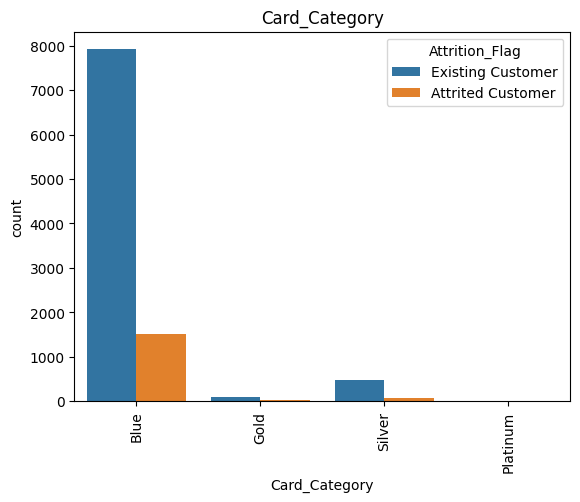

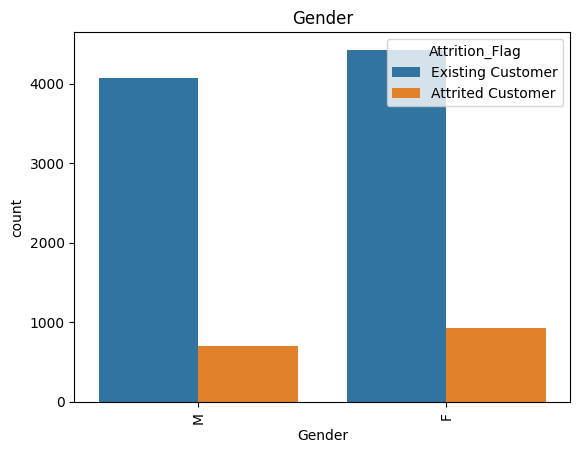

In [142]:
for i, var in enumerate(categorical_variables):
    sns.countplot(data=df, x = var, hue = 'Attrition_Flag')
    plt.title(var)
    plt.xticks(rotation=90)
    plt.show()

In [143]:
df['Attrition_Flag'] = np.where(df['Attrition_Flag'] == 'Attrited Customer', 1, 0)

In [144]:
df.groupby(['Marital_Status'])['Attrition_Flag'].count()

,Attrition_Flag
Marital_Status,
Divorced,748
Married,4687
Single,3943
Unknown,749


In [145]:
df.groupby(['Education_Level'])[['Attrition_Flag']].agg(['count', 'mean'])

Attrition_Flag          
                         count      mean
Education_Level                         
College                   1013  0.152024
Doctorate                  451  0.210643
Graduate                  3128  0.155691
High School               2013  0.152012
Post-Graduate              516  0.178295
Uneducated                1487  0.159381
Unknown                   1519  0.168532

In [146]:
df.groupby(['Marital_Status'])[['Attrition_Flag']].agg(['count', 'mean'])

Attrition_Flag          
                        count      mean
Marital_Status                         
Divorced                  748  0.161765
Married                  4687  0.151269
Single                   3943  0.169414
Unknown                   749  0.172230

In [147]:
df.groupby(['Gender'])[['Attrition_Flag']].agg(['count', 'mean'])

Attrition_Flag          
                count      mean
Gender                         
F                5358  0.173572
M                4769  0.146152

In [148]:
df.groupby(['Card_Category'])[['Attrition_Flag']].agg(['count', 'mean'])

Attrition_Flag          
                       count      mean
Card_Category                         
Blue                    9436  0.160979
Gold                     116  0.181034
Platinum                  20  0.250000
Silver                   555  0.147748

In [149]:
df.groupby(['Income_Category'])[['Attrition_Flag']].agg(['count', 'mean'])

Attrition_Flag          
                         count      mean
Income_Category                         
$120K +                    727  0.173315
$40K - $60K               1790  0.151397
$60K - $80K               1402  0.134807
$80K - $120K              1535  0.157655
Less than $40K            3561  0.171862
Unknown                   1112  0.168165

Построим boxplot-ы некоторых числовых переменных для каждого значения целевой переменной.

<Axes: xlabel='Attrition_Flag', ylabel='Total_Revolving_Bal'>

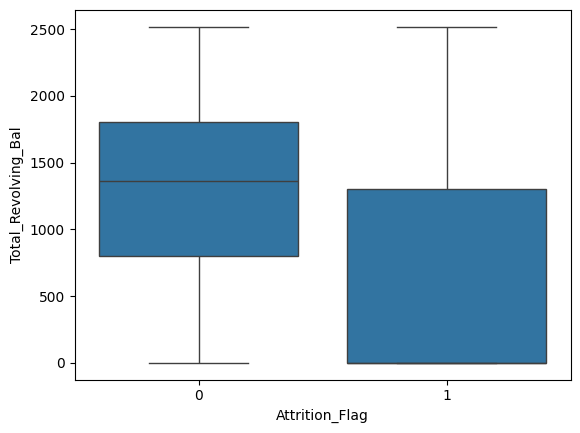

In [150]:
sns.boxplot(data=df, y = 'Total_Revolving_Bal', x = 'Attrition_Flag')

<Axes: xlabel='Attrition_Flag', ylabel='Credit_Limit'>

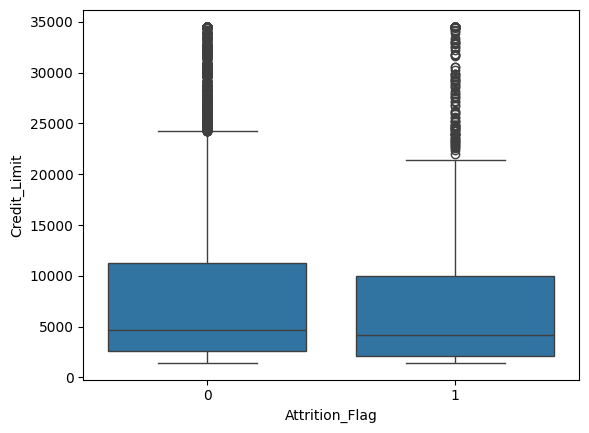

In [151]:
sns.boxplot(data=df, y = 'Credit_Limit', x = 'Attrition_Flag')

Закодируем категориальные столбы

In [152]:
categorical_variables

['Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category',
 'Gender']

In [153]:
data = pd.get_dummies(df, columns = categorical_variables, drop_first=True)

Посмотрим, что получилось:

In [154]:
data.head()

,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,...,Marital_Status_Unknown,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,Gender_M
0,0,45,3,39,5,1,3,12691.0,777,11914.0,...,False,False,True,False,False,False,False,False,False,True
1,0,49,5,44,6,1,2,8256.0,864,7392.0,...,False,False,False,False,True,False,False,False,False,False
2,0,51,3,36,4,1,0,3418.0,0,3418.0,...,False,False,False,True,False,False,False,False,False,True
3,0,40,4,34,3,4,1,3313.0,2517,796.0,...,True,False,False,False,True,False,False,False,False,False
4,0,40,3,21,5,1,0,4716.0,0,4716.0,...,False,False,True,False,False,False,False,False,False,True


In [155]:
data.columns

Index(['Attrition_Flag', 'Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Education_Level_Doctorate', 'Education_Level_Graduate',
       'Education_Level_High School', 'Education_Level_Post-Graduate',
       'Education_Level_Uneducated', 'Education_Level_Unknown',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Unknown', 'Income_Category_$40K - $60K',
       'Income_Category_$60K - $80K', 'Income_Category_$80K - $120K',
       'Income_Category_Less than $40K', 'Income_Category_Unknown',
       'Card_Category_Gold', 'Card_Category_Platinum', 'Card_Category_Silver',
       'Gender_M'],
      dtype='object')

Теперь построим таблицу корреляций между переменными.
Коэффициент корреляция Пирсона измеряется по шкале от -1 до 1. 0 - отсутствие линейной связи, значения, близкие к -1 - сильная отрицательная линейная связь, 1 - сильная положительная линейная связь.

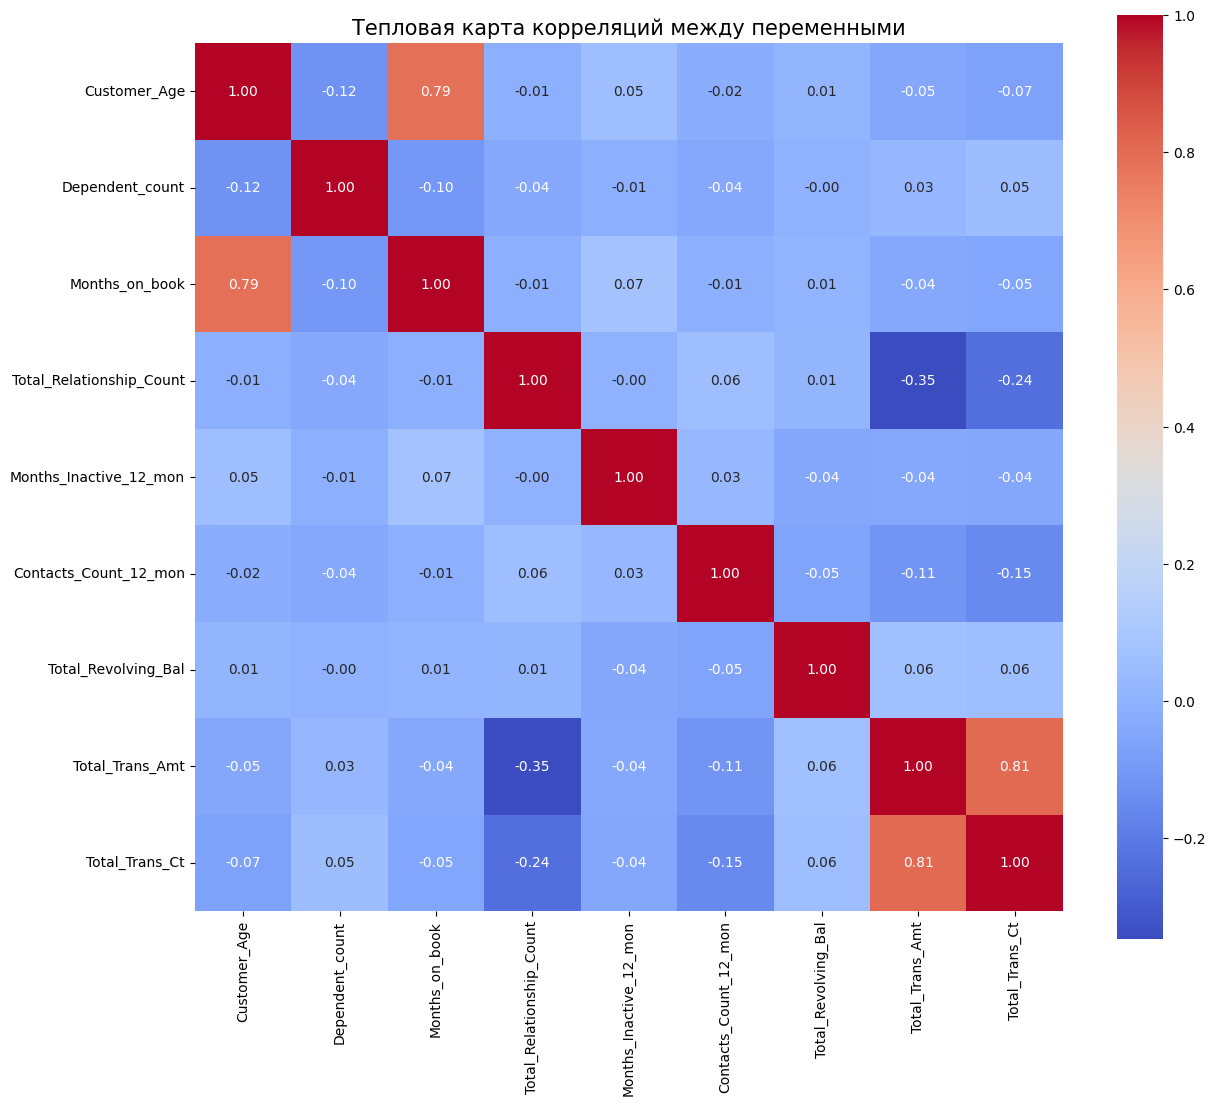

In [156]:
correlation_matrix = df[int_columns].corr(numeric_only=True)

# Строим тепловую карту (heatmap) корреляций
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Тепловая карта корреляций между переменными', fontsize=15)
plt.yticks(rotation=0)
plt.show()

## Логистическая регрессия

Строим бэйзлайн - модель логистической регрессии.

$ P(Response = 1) = \sigma(w_0+w_1*Income + ...) $,
где $ \sigma(x) = \frac{1}{1+e^{(-x)}} $

In [157]:
X_columns = ['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Education_Level_Doctorate', 'Education_Level_Graduate',
       'Education_Level_High School', 'Education_Level_Post-Graduate',
       'Education_Level_Uneducated', 'Education_Level_Unknown',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Unknown', 'Income_Category_$40K - $60K',
       'Income_Category_$60K - $80K', 'Income_Category_$80K - $120K',
       'Income_Category_Less than $40K', 'Income_Category_Unknown',
       'Card_Category_Gold', 'Card_Category_Platinum', 'Card_Category_Silver',
       'Gender_M']

In [158]:
X_columns

['Customer_Age',
 'Dependent_count',
 'Months_on_book',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio',
 'Education_Level_Doctorate',
 'Education_Level_Graduate',
 'Education_Level_High School',
 'Education_Level_Post-Graduate',
 'Education_Level_Uneducated',
 'Education_Level_Unknown',
 'Marital_Status_Married',
 'Marital_Status_Single',
 'Marital_Status_Unknown',
 'Income_Category_$40K - $60K',
 'Income_Category_$60K - $80K',
 'Income_Category_$80K - $120K',
 'Income_Category_Less than $40K',
 'Income_Category_Unknown',
 'Card_Category_Gold',
 'Card_Category_Platinum',
 'Card_Category_Silver',
 'Gender_M']

In [159]:
lr =  LogisticRegression(solver='liblinear')
X = data.drop(['Attrition_Flag'], axis=1)
y = data['Attrition_Flag']
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=42)

In [160]:
ytrain.value_counts()

,count
Attrition_Flag,
0,5957
1,1131


In [161]:
Xtrain = Xtrain[X_columns]
Xtest = Xtest[X_columns]
lr.fit(Xtrain, ytrain)
pred_train = lr.predict(Xtrain)
pred_test = lr.predict(Xtest)

In [162]:
pred_train_prob = lr.predict_proba(Xtrain)
pred_test_prob = lr.predict_proba(Xtest)

Не-ML бэйзлайн

In [163]:
pred_train_2 = Xtrain['Months_Inactive_12_mon'] > 3
pred_test_2 = Xtest['Months_Inactive_12_mon'] > 3

In [164]:
pred_train_2

,Months_Inactive_12_mon
415,False
3749,False
9295,False
8290,False
7672,False
...,...
5734,False
5191,False
5390,False
860,False


#### Метрики качества модели

##### **Accuracy, Precision, Recall, F1**

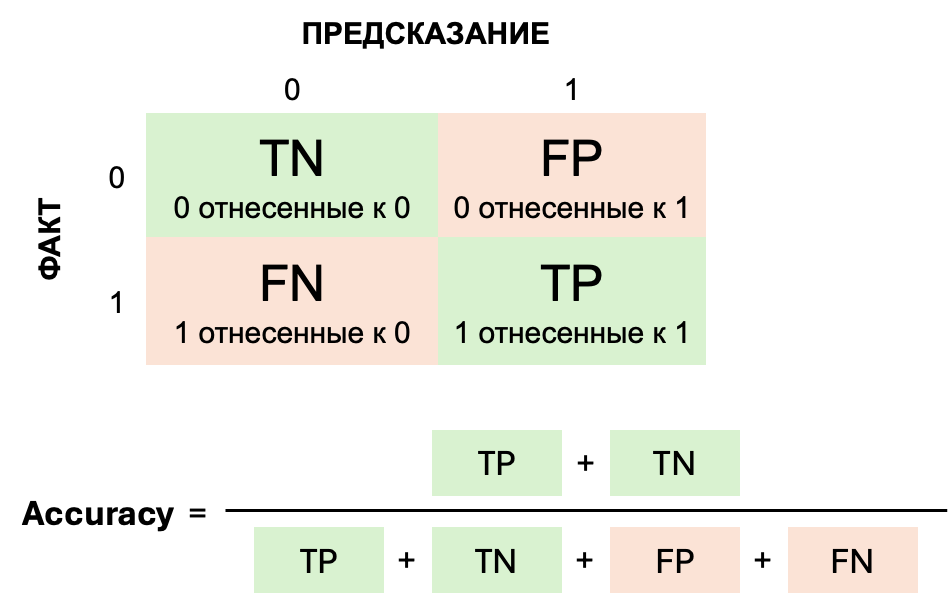

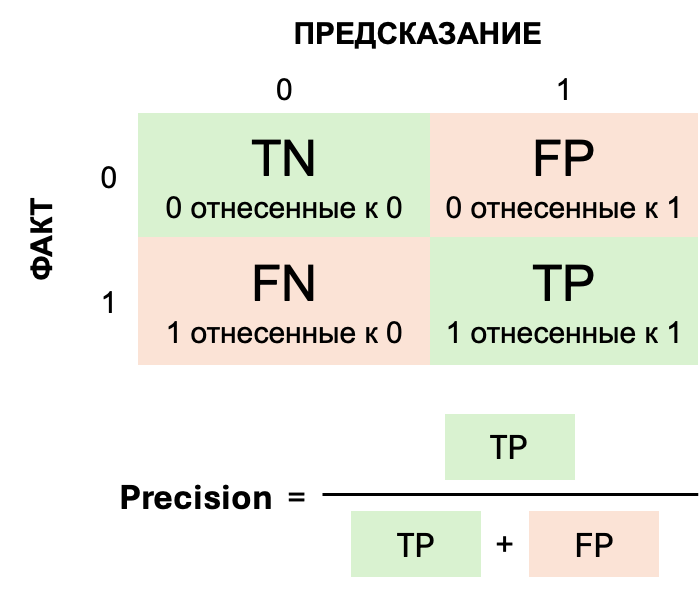

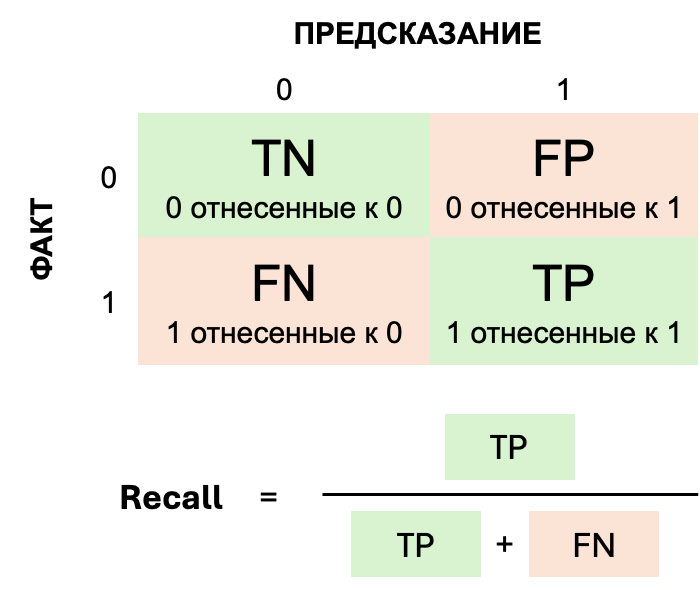

In [165]:
print('Accuracy score, train:', round(accuracy_score(ytrain, pred_train), 3))
print('Recall score, train:',  round(recall_score(ytrain, pred_train), 3))
print('Precision score, train:', round(precision_score(ytrain, pred_train), 3))
print('ROC AUC, train:', round(roc_auc_score(ytrain, pred_train_prob[:, 1]), 3))

print('\nAccuracy score, test:', round(accuracy_score(ytest, pred_test), 3))
print('Recall score, test:',  round(recall_score(ytest, pred_test), 3))
print('Precision score, test:', round(precision_score(ytest, pred_test), 3))
print('ROC AUC, test:', round(roc_auc_score(ytest, pred_test_prob[:, 1]), 3))

Accuracy score, train: 0.892
Recall score, train: 0.496
Precision score, train: 0.741
ROC AUC, train: 0.912

Accuracy score, test: 0.883
Recall score, test: 0.444
Precision score, test: 0.731
ROC AUC, test: 0.898


In [166]:
print('Accuracy score, train:', round(accuracy_score(ytrain, pred_train_2), 3))
print('Recall score, train:',  round(recall_score(ytrain, pred_train_2), 3))
print('Precision score, train:', round(precision_score(ytrain, pred_train_2), 3))
print('ROC AUC, train:', round(roc_auc_score(ytrain, pred_train_2), 3))

print('\nAccuracy score, test:', round(accuracy_score(ytest, pred_test_2), 3))
print('Recall score, test:',  round(recall_score(ytest, pred_test_2), 3))
print('Precision score, test:', round(precision_score(ytest, pred_test_2), 3))
print('ROC AUC, test:', round(roc_auc_score(ytest, pred_test_2), 3))

Accuracy score, train: 0.805
Recall score, train: 0.116
Precision score, train: 0.256
ROC AUC, train: 0.526

Accuracy score, test: 0.796
Recall score, test: 0.101
Precision score, test: 0.222
ROC AUC, test: 0.516


In [167]:
scaler = StandardScaler()
scaler.fit(Xtrain)
Xtrain_norm = scaler.transform(Xtrain)
Xtest_norm = scaler.transform(Xtest)
lr =  LogisticRegression(solver= 'liblinear')
lr.fit(Xtrain_norm, ytrain)
pred_train = lr.predict(Xtrain_norm)
pred_test = lr.predict(Xtest_norm)
pred_train_prob = lr.predict_proba(Xtrain_norm)
pred_test_prob = lr.predict_proba(Xtest_norm)

In [168]:
print('Accuracy score, train:', round(accuracy_score(ytrain, pred_train), 3))
print('Recall score, train:',  round(recall_score(ytrain, pred_train), 3))
print('Precision score, train:', round(precision_score(ytrain, pred_train), 3))
print('ROC AUC, train:', round(roc_auc_score(ytrain, pred_train_prob[:, 1]), 3))

print('\nAccuracy score, test:', round(accuracy_score(ytest, pred_test), 3))
print('Recall score, test:',  round(recall_score(ytest, pred_test), 3))
print('Precision score, test:', round(precision_score(ytest, pred_test), 3))
print('ROC AUC, test:', round(roc_auc_score(ytest, pred_test_prob[:, 1]), 3))

Accuracy score, train: 0.906
Recall score, train: 0.587
Precision score, train: 0.771
ROC AUC, train: 0.928

Accuracy score, test: 0.899
Recall score, test: 0.548
Precision score, test: 0.766
ROC AUC, test: 0.921


In [169]:
pd.DataFrame(zip(X_columns, list(lr.coef_[0])))

,0,1
0,Customer_Age,0.051801
1,Dependent_count,0.135883
2,Months_on_book,-0.100910
3,Total_Relationship_Count,-0.684118
4,Months_Inactive_12_mon,0.519666
5,Contacts_Count_12_mon,0.579162
6,Credit_Limit,-0.109909
7,Total_Revolving_Bal,-0.712916
8,Avg_Open_To_Buy,-0.045645
9,Total_Amt_Chng_Q4_Q1,-0.106340


In [170]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

def preprocess_fit_transform(X_train, X_test, y_train=None, y_test=None,
                            scale_features=True, handle_missing=True,
                            impute_strategy='mean', categorical_columns=None,
                            drop_columns=None):

    if drop_columns is not None:
        X_train = X_train.drop(columns=drop_columns, errors='ignore')
        X_test = X_test.drop(columns=drop_columns, errors='ignore')

    if handle_missing:
        if categorical_columns is None:
            categorical_columns = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

        numeric_columns = [col for col in X_train.columns if col not in categorical_columns]

        if numeric_columns:
            numeric_imputer = SimpleImputer(strategy=impute_strategy)
            X_train[numeric_columns] = numeric_imputer.fit_transform(X_train[numeric_columns])
            X_test[numeric_columns] = numeric_imputer.transform(X_test[numeric_columns])

        if categorical_columns:
            cat_imputer = SimpleImputer(strategy='most_frequent')
            X_train[categorical_columns] = cat_imputer.fit_transform(X_train[categorical_columns])
            X_test[categorical_columns] = cat_imputer.transform(X_test[categorical_columns])

    scaler = None
    if scale_features:
        if categorical_columns is None:
            cols_to_scale = X_train.select_dtypes(include=[np.number]).columns.tolist()
        else:
            cols_to_scale = [col for col in X_train.columns
                            if col not in categorical_columns and
                            X_train[col].dtype in [np.float64, np.float32, np.int64, np.int32]]

        if cols_to_scale:
            scaler = StandardScaler()
            X_train[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
            X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

    return X_train, X_test


def evaluate_model_processed(model, X_train, X_test, y_train, y_test):

    model.fit(X_train, y_train)

    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

    try:
        proba_train = model.predict_proba(X_train)[:, 1]
        proba_test = model.predict_proba(X_test)[:, 1]
        roc_auc_train = roc_auc_score(y_train, proba_train)
        roc_auc_test = roc_auc_score(y_test, proba_test)
    except:
        roc_auc_train = np.nan
        roc_auc_test = np.nan

    metrics = {
        'Train_Accuracy': round(accuracy_score(y_train, pred_train), 4),
        'Train_Recall': round(recall_score(y_train, pred_train), 4),
        'Train_Precision': round(precision_score(y_train, pred_train), 4),
        'Train_F1': round(f1_score(y_train, pred_train), 4),
        'Train_ROC_AUC': round(roc_auc_train, 4),
        'Test_Accuracy': round(accuracy_score(y_test, pred_test), 4),
        'Test_Recall': round(recall_score(y_test, pred_test), 4),
        'Test_Precision': round(precision_score(y_test, pred_test), 4),
        'Test_F1': round(f1_score(y_test, pred_test), 4),
        'Test_ROC_AUC': round(roc_auc_test, 4)
    }

    return metrics


from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
from catboost import CatBoostClassifier
import warnings
warnings.filterwarnings('ignore')



X_train, X_test, y_train, y_test = Xtrain, Xtest, ytrain, ytest

X_train_proc, X_test_proc = preprocess_fit_transform(X_train.copy(), X_test.copy(), scale_features=True)


models = {
    'LogisticRegression': LogisticRegression(solver='liblinear', max_iter=1000, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'RandomForest': RandomForestClassifier(n_estimators=150, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=150, random_state=42, max_depth=5),
    'XGBoost': xgb.XGBClassifier(n_estimators=150, random_state=42, eval_metric='logloss', use_label_encoder=False, max_depth=5),
    'CatBoost': CatBoostClassifier(n_estimators=150, random_state=42, verbose=0, max_depth=5)
}

results = []
for model_name, model in models.items():
    metrics = evaluate_model_processed(model, X_train_proc, X_test_proc, y_train, y_test)
    metrics['Model'] = model_name
    results.append(metrics)

results_df = pd.DataFrame(results).set_index('Model')
results_df

,Train_Accuracy,Train_Recall,Train_Precision,Train_F1,Train_ROC_AUC,Test_Accuracy,Test_Recall,Test_Precision,Test_F1,Test_ROC_AUC
Model,,,,,,,,,,
LogisticRegression,0.9063,0.5871,0.7712,0.6667,0.9277,0.8990,0.5484,0.7662,0.6392,0.9212
KNN,0.9089,0.4951,0.8819,0.6342,0.9518,0.8710,0.3206,0.7430,0.4479,0.7913
DecisionTree,1.0000,1.0000,1.0000,1.0000,1.0000,0.9302,0.7742,0.7934,0.7837,0.8674
RandomForest,1.0000,1.0000,1.0000,1.0000,1.0000,0.9529,0.7601,0.9401,0.8406,0.9883
GradientBoosting,0.9987,0.9938,0.9982,0.9960,1.0000,0.9684,0.8831,0.9202,0.9012,0.9932
XGBoost,1.0000,1.0000,1.0000,1.0000,1.0000,0.9681,0.8992,0.9047,0.9019,0.9939
CatBoost,0.9925,0.9655,0.9873,0.9763,0.9994,0.9704,0.8972,0.9194,0.9082,0.9943


In [171]:
dt= DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

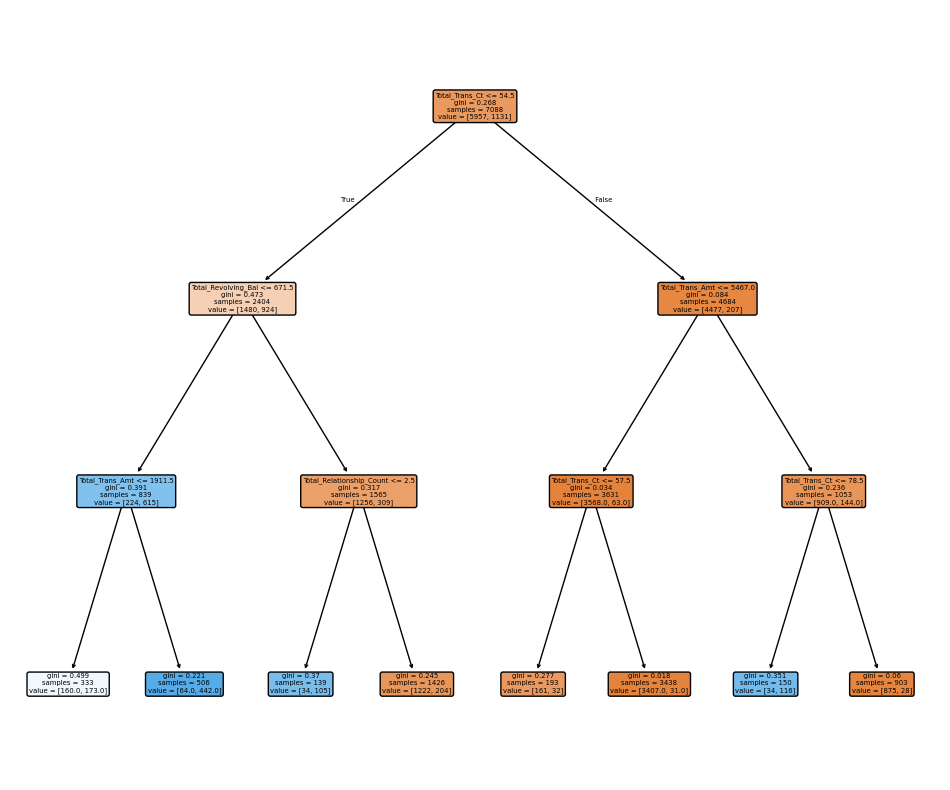

In [172]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
plt.figure(figsize=(12,10))
plot_tree(dt, feature_names=X_train.columns, filled=True, rounded=True)
plt.show()

In [173]:
scaler = StandardScaler()
scaler.fit(Xtrain)
Xtrain_norm = scaler.transform(Xtrain)
Xtest_norm = scaler.transform(Xtest)

models = {
    'LogisticRegression': LogisticRegression(solver='liblinear', max_iter=1000, random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'RandomForest': RandomForestClassifier(n_estimators=150, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=150, random_state=42, max_depth=5),
    'XGBoost': xgb.XGBClassifier(n_estimators=150, random_state=42, eval_metric='logloss', use_label_encoder=False, max_depth=5),
    'CatBoost': CatBoostClassifier(n_estimators=150, random_state=42, verbose=0, max_depth=5)
}

results = []
for model_name, model in models.items():
    metrics = evaluate_model_processed(model, Xtrain_norm, Xtest_norm, y_train, y_test)
    metrics['Model'] = model_name
    results.append(metrics)

results_df = pd.DataFrame(results).set_index('Model')
results_df

,Train_Accuracy,Train_Recall,Train_Precision,Train_F1,Train_ROC_AUC,Test_Accuracy,Test_Recall,Test_Precision,Test_F1,Test_ROC_AUC
Model,,,,,,,,,,
LogisticRegression,0.9063,0.5871,0.7712,0.6667,0.9277,0.8990,0.5484,0.7662,0.6392,0.9212
KNN,0.9089,0.4951,0.8819,0.6342,0.9518,0.8710,0.3206,0.7430,0.4479,0.7913
DecisionTree,1.0000,1.0000,1.0000,1.0000,1.0000,0.9302,0.7742,0.7934,0.7837,0.8674
RandomForest,1.0000,1.0000,1.0000,1.0000,1.0000,0.9529,0.7601,0.9401,0.8406,0.9883
GradientBoosting,0.9987,0.9938,0.9982,0.9960,1.0000,0.9684,0.8831,0.9202,0.9012,0.9932
XGBoost,1.0000,1.0000,1.0000,1.0000,1.0000,0.9681,0.8992,0.9047,0.9019,0.9939
CatBoost,0.9925,0.9655,0.9873,0.9763,0.9994,0.9704,0.8972,0.9194,0.9082,0.9943


In [174]:
feature_importances = pd.DataFrame(columns=['feature', 'value'])
for model in models:
  try:
      part = pd.DataFrame(zip(X_train_proc.columns, models[model].feature_importances_), columns=['feature', 'value'])
      part['model'] = model
      feature_importances = feature_importances._append(part)
  except:
      pass

In [175]:
feature_importances[feature_importances['model'] == 'RandomForest'].sort_values(by='value')

,feature,value,model
29,Card_Category_Platinum,0.000228,RandomForest
28,Card_Category_Gold,0.000670,RandomForest
30,Card_Category_Silver,0.001914,RandomForest
22,Marital_Status_Unknown,0.002145,RandomForest
17,Education_Level_Post-Graduate,0.002196,RandomForest
14,Education_Level_Doctorate,0.002253,RandomForest
27,Income_Category_Unknown,0.002784,RandomForest
24,Income_Category_$60K - $80K,0.003015,RandomForest
18,Education_Level_Uneducated,0.003080,RandomForest
19,Education_Level_Unknown,0.003354,RandomForest


In [176]:
feature_importances[feature_importances['model'] == 'GradientBoosting'].sort_values(by='value')

,feature,value,model
29,Card_Category_Platinum,0.000000,GradientBoosting
23,Income_Category_$40K - $60K,0.000006,GradientBoosting
28,Card_Category_Gold,0.000028,GradientBoosting
18,Education_Level_Uneducated,0.000110,GradientBoosting
26,Income_Category_Less than $40K,0.000129,GradientBoosting
16,Education_Level_High School,0.000148,GradientBoosting
15,Education_Level_Graduate,0.000167,GradientBoosting
21,Marital_Status_Single,0.000247,GradientBoosting
14,Education_Level_Doctorate,0.000259,GradientBoosting
30,Card_Category_Silver,0.000294,GradientBoosting


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_leaf': [1, 2, 4]
}

gb = GradientBoostingClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=gb,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(Xtrain_norm, y_train)

print("Лучшие параметры:", grid_search.best_params_)
print("Лучшая точность (CV):", round(grid_search.best_score_, 4))

best_gb = grid_search.best_estimator_

best_metrics = evaluate_model_processed(best_gb, X_train_proc, X_test_proc, y_train, y_test)

results_df.loc['GradientBoosting_GridSearch'] = best_metrics

Fitting 5 folds for each of 27 candidates, totalling 135 fits


In [ ]:
results_df.head()